# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather_df = pd.DataFrame({"City" : cities})
weather_df['Cloudiness'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""
weather_df['Humidity'] = ""
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Wind Speed'] = ""

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gashua,,,,,,,,
1,mezen,,,,,,,,
2,chokurdakh,,,,,,,,
3,ushuaia,,,,,,,,
4,pevek,,,,,,,,


In [6]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": weather_api_key
}

for index, row in weather_df.iterrows():

    city = row['City']

    print(f"Retrieving Results for record {index} of {len(cities)}: {city}.")

    params['q'] = city

    response = requests.get(base_url, params=params).json()

    try:
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = time.strptime(response['dt'], '%m/%d/%y')
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']

    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("Data Retrieval Complete!")

han.
Retrieving Results for record 258 of 625: husavik.
Retrieving Results for record 259 of 625: sobolevo.
Retrieving Results for record 260 of 625: rafai.
Retrieving Results for record 261 of 625: ulaangom.
Retrieving Results for record 262 of 625: san patricio.
Retrieving Results for record 263 of 625: high level.
Retrieving Results for record 264 of 625: kati.
Retrieving Results for record 265 of 625: greencastle.
Retrieving Results for record 266 of 625: qaqortoq.
Retrieving Results for record 267 of 625: halalo.
City not found. Skipping...
Retrieving Results for record 268 of 625: mikhaylovsk.
Retrieving Results for record 269 of 625: jamestown.
Retrieving Results for record 270 of 625: shirokiy.
Retrieving Results for record 271 of 625: mahanoro.
Retrieving Results for record 272 of 625: saint george.
Retrieving Results for record 273 of 625: tangier.
Retrieving Results for record 274 of 625: sao filipe.
Retrieving Results for record 275 of 625: craig.
Retrieving Results for rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.replace('', np.nan, inplace=True)
weather_df.dropna(axis=0, how='any', inplace=True)

weather_df.to_csv("output_data/cities.csv")

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gashua,18.0,NG,1.584411e+09,11.0,12.87,11.05,293.21,3.22
1,mezen,30.0,RU,1.584411e+09,90.0,65.85,44.24,266.82,7.22
2,chokurdakh,0.0,RU,1.584411e+09,88.0,70.63,147.92,249.85,0.48
3,ushuaia,40.0,AR,1.584411e+09,57.0,-54.80,-68.30,282.15,10.30
4,pevek,94.0,RU,1.584411e+09,78.0,69.70,170.31,270.62,10.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [22]:
def date_converter(unixtime):
    formatted_date_string = datetime.utcfromtimestamp(unixtime).strftime('%m/%d/%y')

    return formatted_date_string

data_collection_date = date_converter(weather_df.get_value(0, 'Date'))


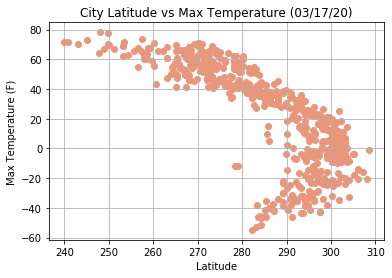

In [27]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], c='darksalmon')
plt.title(f"City Latitude vs Max Temperature ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

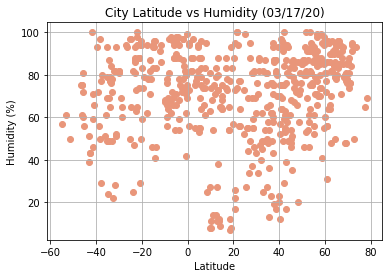

In [30]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], c='darksalmon')
plt.title(f"City Latitude vs Humidity ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

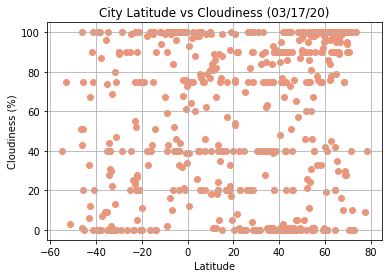

In [29]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], c='darksalmon')
plt.title(f"City Latitude vs Cloudiness ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

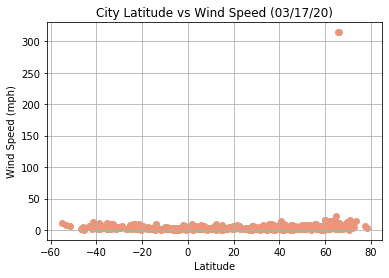

In [31]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], c='darksalmon')
plt.title(f"City Latitude vs Wind Speed ({data_collection_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot_creator(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Lat'], north_weather_df['Max Temp'])
    regress_values = north_weather_df['Lat'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is {round(rvalue,2)}")

    plt.scatter(north_weather_df['Lat'], north_weather_df['Max Temp'], c='darksalmon')
    plt.plot(north_weather_df['Lat'], regress_values, "r-")
    plt.annotate(line_eq, (35,300), fontsize=15, color="red")
    plt.title("Northern Hemisphere - Max Temp vs. Latitude")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (F)')
    plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames
north_weather_df = weather_df[weather_df['Lat'] >= 0]
south_weather_df = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.89


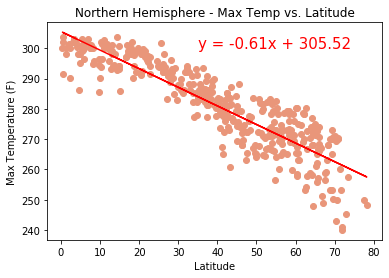

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather_df['Lat'], north_weather_df['Max Temp'])
regress_values = north_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(north_weather_df['Lat'], north_weather_df['Max Temp'], c='darksalmon')
plt.plot(north_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (35,300), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.59


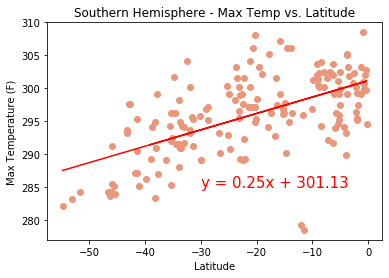

In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather_df['Lat'], south_weather_df['Max Temp'])
regress_values = south_weather_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is {round(rvalue,2)}")

plt.scatter(south_weather_df['Lat'], south_weather_df['Max Temp'], c='darksalmon')
plt.plot(south_weather_df['Lat'], regress_values, "r-")
plt.annotate(line_eq, (-30,285), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


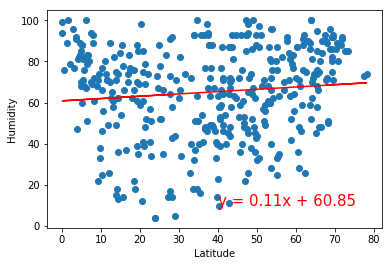

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


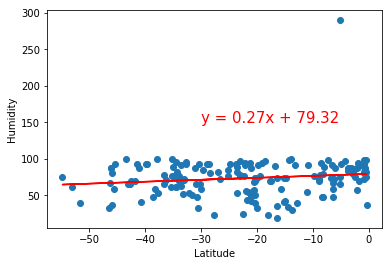

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


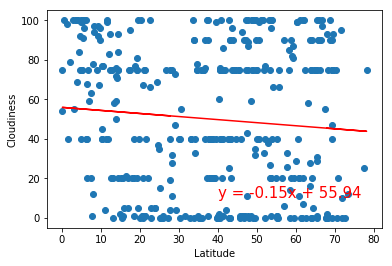

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


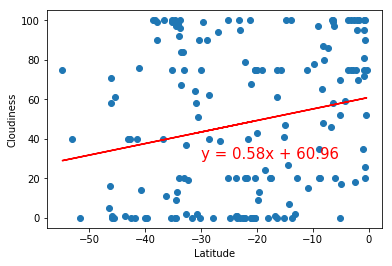

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


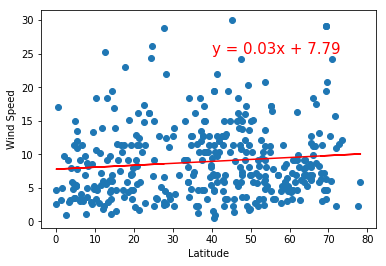

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


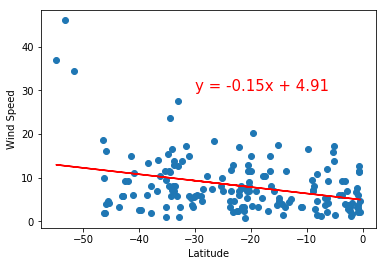